In [1]:

import random
import os
import glob
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import keras 
import gzip
import pickle
import shap

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
import matplotlib.pyplot as plt

os.chdir('../../functions/')
from models import get_class_weight, preprocessor, plot_confusion_matrix, compile_image_model, \
                    CNN_model,label_dict, revlabel_dict, recreate_labels, map_path_to_augmented


from preprocessing import create_data_set, randomize
from shap_plot import plot_4class_shap_figures, plot_4class_shap_figures_2_chan

In [2]:
label_dict

{0: 'objects', 1: 'hole', 2: 'oil_spot', 3: 'thread_error'}

In [3]:
today = "2024-10-09"

with gzip.open(f"../data/models/defect_identification/datasets/labels_defect_train_{today}.pckl", 'rb') as f:
    labels_defect_train = pickle.load( f)
with gzip.open(f"../data/models/defect_identification/datasets//labels_defect_eval_{today}.pckl", 'rb') as f:
    labels_defect_eval = pickle.load(f)
with gzip.open(f"../data/models/defect_identification/datasets/labels_defect_test_{today}.pckl", 'rb') as f:
    labels_defect_test = pickle.load(f)
with gzip.open(f"../data/models/defect_identification/datasets/features_train_defect_array_{today}.pckl", 'rb') as f:
    features_train_defect_array = pickle.load(f)
with gzip.open(f"../data/models/defect_identification/datasets/features_eval_defect_array_{today}.pckl", 'rb') as f:
    features_eval_defect_array = pickle.load(f)
with gzip.open(f"../data/models/defect_identification/datasets/features_test_defect_array_{today}.pckl", 'rb') as f:
    features_test_defect_array = pickle.load(f)

In [4]:
import importlib
import models
# importlib.reload(models)
from models import get_class_weight, preprocessor, plot_confusion_matrix, compile_image_model, \
                    CNN_model,label_dict, revlabel_dict, recreate_labels

In [5]:
dim = [3, 7]
nums_filters = [4, 16]
with gzip.open(f"../data/models/defect_identification/models/DefID_y_prob_{str(dim)}_{str(nums_filters)}_{today}.pckl", 'rb') as f:
    y_prob = pickle.load(f)
with gzip.open(f"../data/models/defect_identification/models/DefID_image_model_{str(dim)}_{str(nums_filters)}_{today}.pckl", 'rb') as f:
    image_model = pickle.load(f)
with gzip.open(f"../data/models/defect_identification/models/DefID_image_learner_{str(dim)}_{str(nums_filters)}_{today}.pckl", 'rb') as f:
    image_learner = pickle.load(f)
with gzip.open(f"../data/models/defect_identification/models/DefID_history_{str(dim)}_{str(nums_filters)}_{today}.pckl", 'rb') as f:
    history = pickle.load(f)

In [6]:
if not isinstance(features_test_defect_array,  np.ndarray):
    features_test_defect_array = np.array(features_test_defect_array)
    print('no')
e = shap.DeepExplainer(image_learner, [features_test_defect_array]*2)
shap_values = e.shap_values([features_test_defect_array]*2)

/Users/willtong/Library/Caches/pypoetry/virtualenvs/tilda-defect-classific-LX6T3Nl7-py3.12/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [7]:
pwd

'/Users/willtong/Documents/AI_models.nosync/TILDA_defect_classification/TILDA-defect-classific/functions'

In [7]:
# os.chdir('../functions/')
import importlib
# importlib.reload(shap_plot)
# import shap_plot
from shap_plot import plot_4class_shap_figures
os.chdir('../notebook_CNN/')

In [8]:
y_predict = np.array(image_learner([features_test_defect_array]*2))

In [9]:
# with gzip.open("shap_values_4classx2_3-4_7-16.pckl", "wb") as f:
#     pickle.dump(shap_values, f)
# with gzip.open("y_predict_4classx2_3-4_7-16.pckl", "wb") as f:
#     pickle.dump(y_predict, f)
# with gzip.open("features_test_defect_array_4classx2_3-4_7-16.pckl", "wb") as f:
#     pickle.dump(features_test_defect_array, f)

with gzip.open("shap_values_4classx2_3-4_7-16.pckl", "rb") as f:
    shap_values = pickle.load(f)
with gzip.open("y_predict_4classx2_3-4_7-16.pckl", "rb") as f:
    y_predict = pickle.load(f)
with gzip.open("features_test_defect_array_4classx2_3-4_7-16.pckl", "rb") as f:
    features_test_defect_array = pickle.load(f)

In [10]:
shap_values_sum = np.array(shap_values).sum(0)

thread_error thread_error
hole oil_spot
thread_error thread_error
objects objects
hole hole
objects objects
objects objects
hole thread_error
objects oil_spot
oil_spot oil_spot
objects thread_error
image_num: 136
Probabilities: [ 7.8 59.1 31.9  1.2]
actual: (3, 'thread_error'), predicted(1, 'hole')


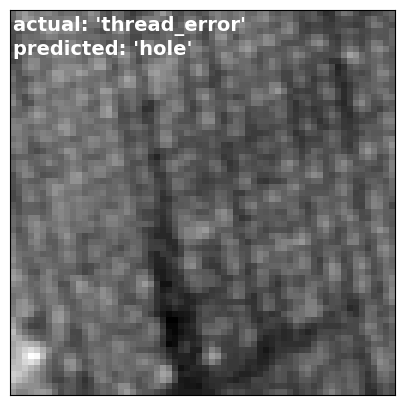

[-shap_values_image_0.min(),shap_values_image_0.max()] =[0.42326548611294096, 0.576734513887059]
[-shap_values_image_1.min(),shap_values_image_1.max()] =[0.4169777205691841, 0.5830222794308159]
vmax_0 = 0.576734513887059, vmax_1 = 0.5830222794308159
filename = ../images/shap_plots/4-class/2-channels/thread_error/incorrect/GS_4cl_reload_shapval_3, 7_4, 16_img0136.png


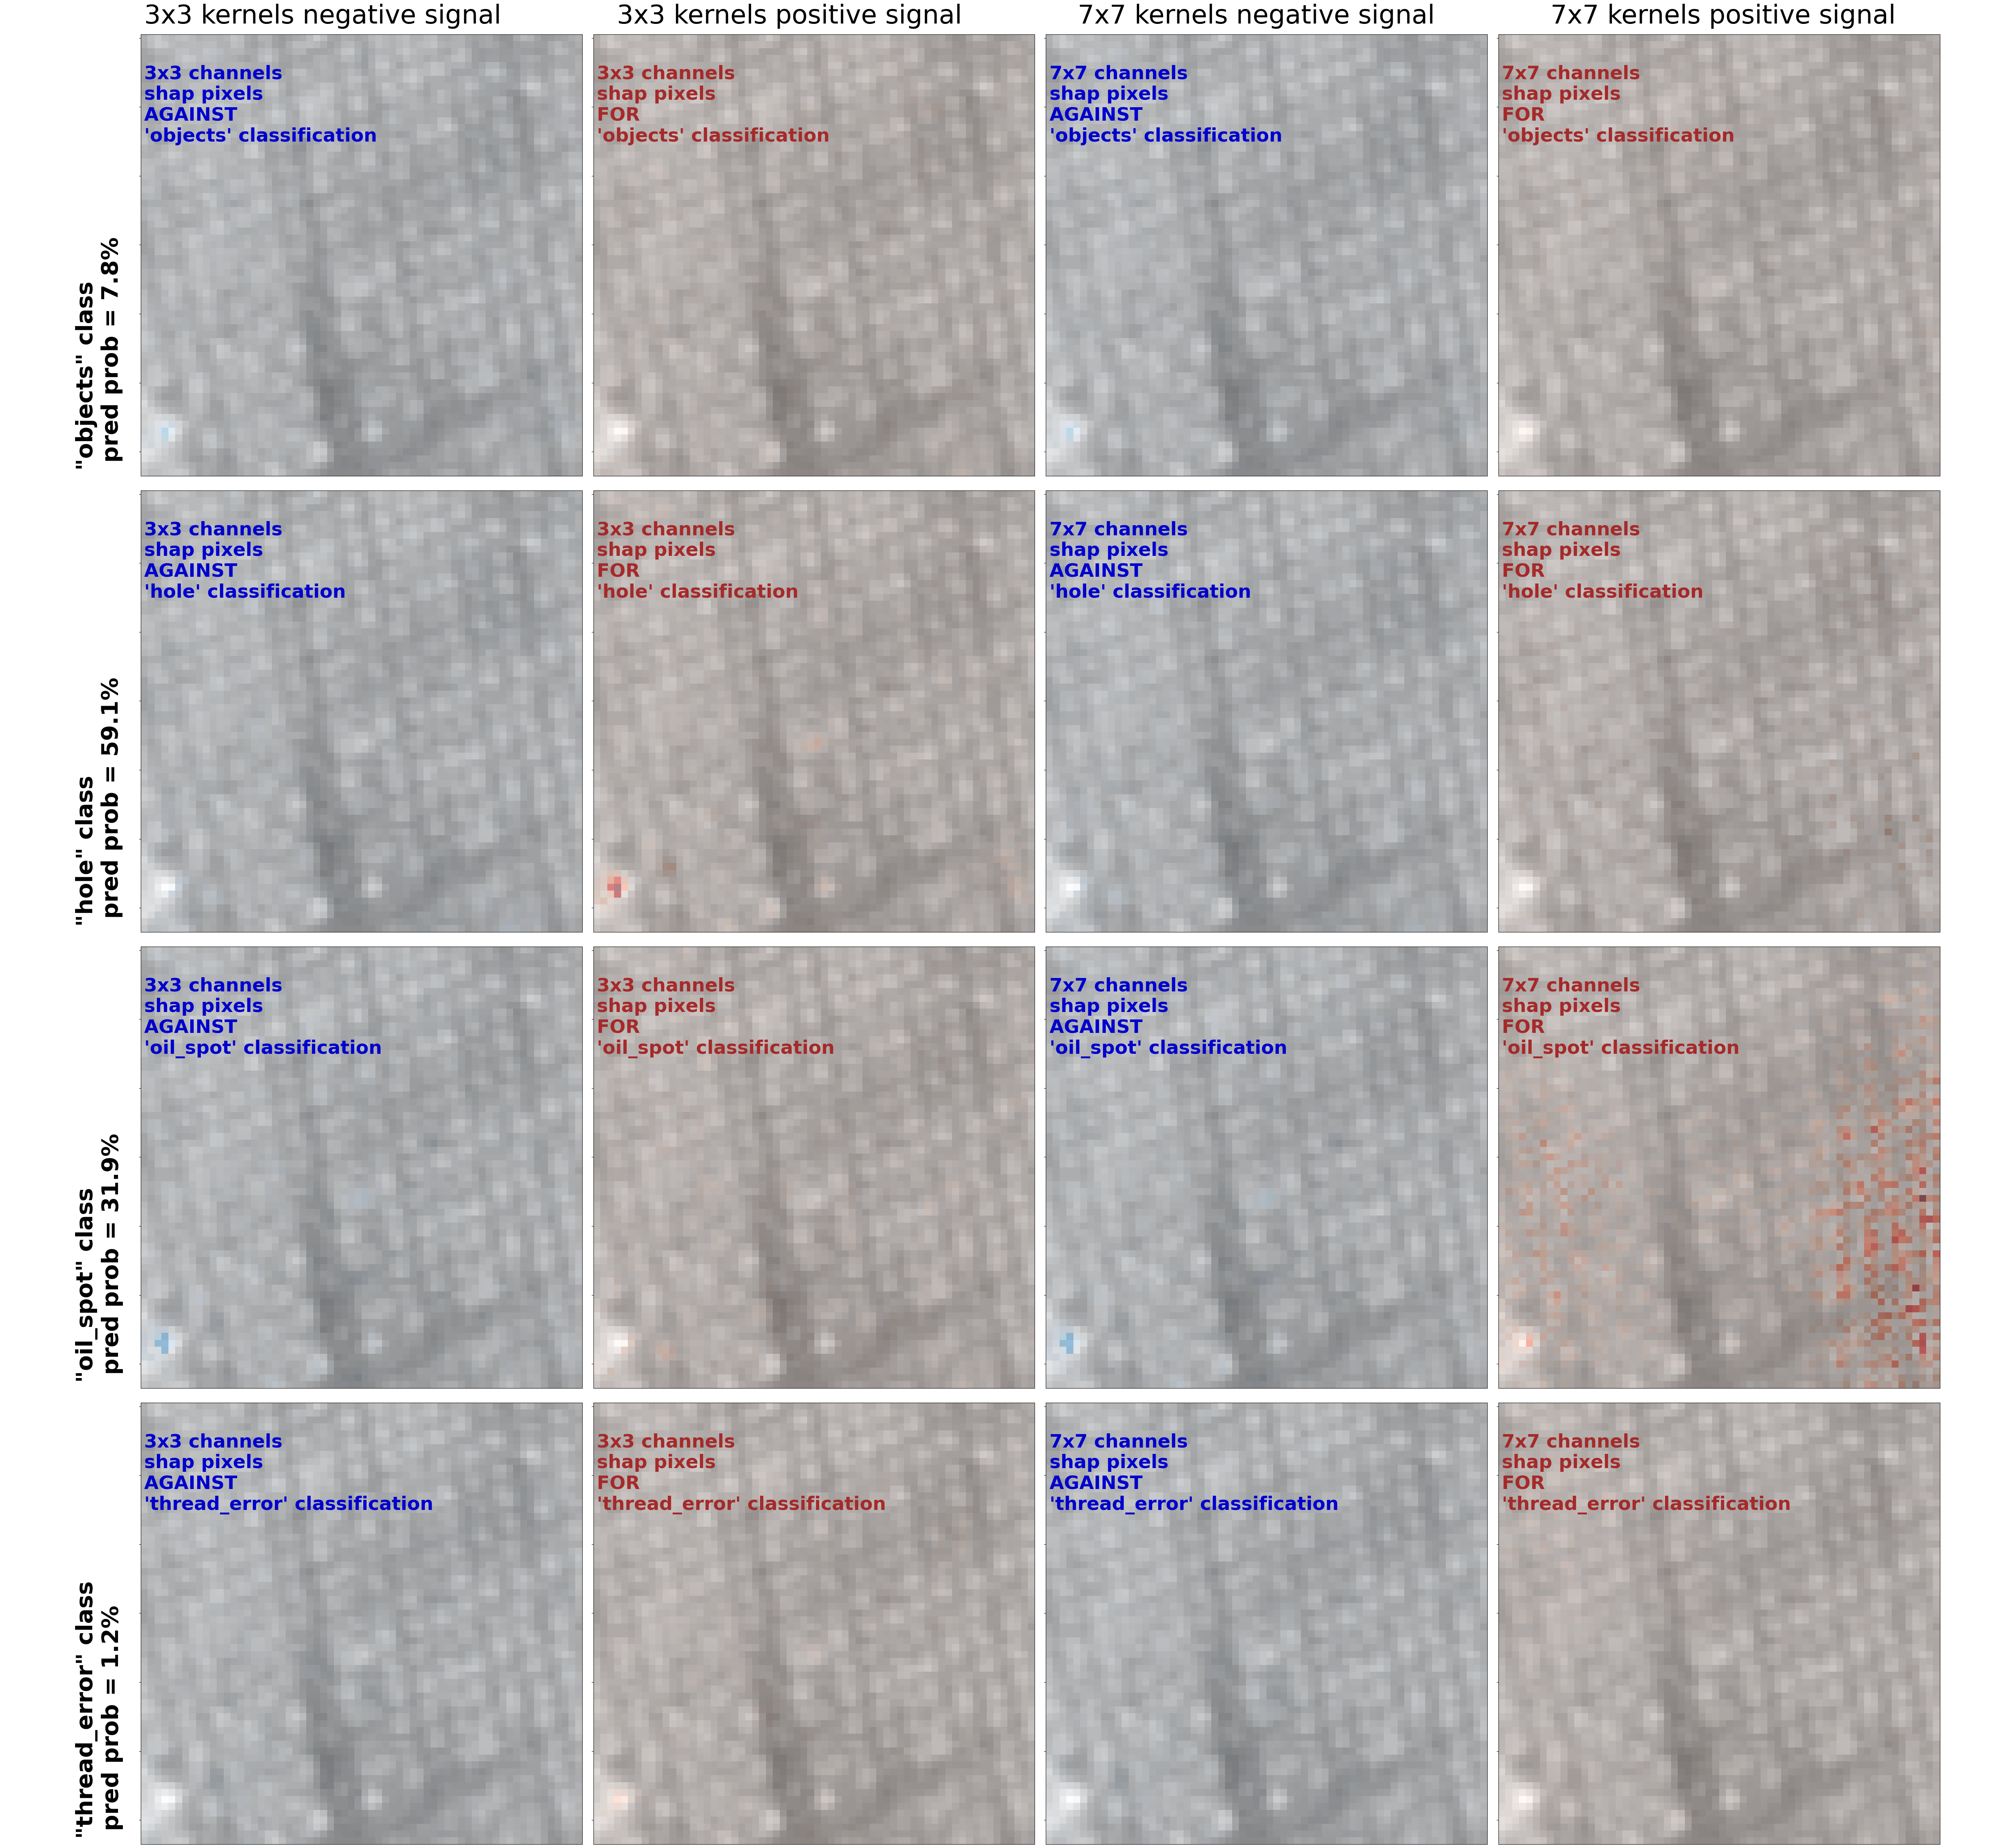

In [11]:
y_pred = None
y_actual = None
image_num = None
while (y_actual != "thread_error" or y_pred != "objects"):
    image_num = np.random.randint(features_test_defect_array.shape[0])
    y_pred = label_dict[np.array(y_predict[image_num]).argmax()]
    y_actual = label_dict[labels_defect_test[image_num]]
    print(y_pred, y_actual)
if y_actual == y_pred:
    folder_name = 'correct'
else:
    folder_name = 'incorrect'
filename = None
# 3, 221, 127 8, 40, 170,240, 127, 182, 11, 17, 160, 31, 97, 66, 154, 6, 100, 140, 26, 236
image_num = 136
filename = f"../images/shap_plots/4-class/2-channels/{y_actual}/{folder_name}/GS_4cl_reload_shapval_{str(dim)[1:-1]}_{str(nums_filters)[1:-1]}_img{str(image_num).zfill(4)}.png"
plot_4class_shap_figures_2_chan(shap_values, features_test_defect_array, y_predict, 
                         image_num, label_dict, labels_defect_test, size = 36, 
                         filename =filename)
# plot_4class_shap_figures(shap_values_sum, features_test_defect_array, y_predict, 
#                          image_num, label_dict, labels_defect_test, size = 30, 
#                          filename =filename)